In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#df=pd.read_csv(r"AI/fifa_ranking.csv")

In [3]:
df.shape

(57793, 16)

In [4]:
df.head() 

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,08/08/1993
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,08/08/1993
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,08/08/1993
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,08/08/1993
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,08/08/1993


In [5]:
df.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [7]:
df.duplicated().any()
df.drop_duplicates(keep='first', inplace = True)

In [8]:
df.isna().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [9]:
df.nunique()

rank                         209
country_full                 216
country_abrv                 216
total_points               11114
previous_points             1557
rank_change                  121
cur_year_avg                7419
cur_year_avg_weighted       7419
last_year_avg               7473
last_year_avg_weighted      7001
two_year_ago_avg            7575
two_year_ago_weighted       6513
three_year_ago_avg          7628
three_year_ago_weighted     5849
confederation                  6
rank_date                    286
dtype: int64

<AxesSubplot:>

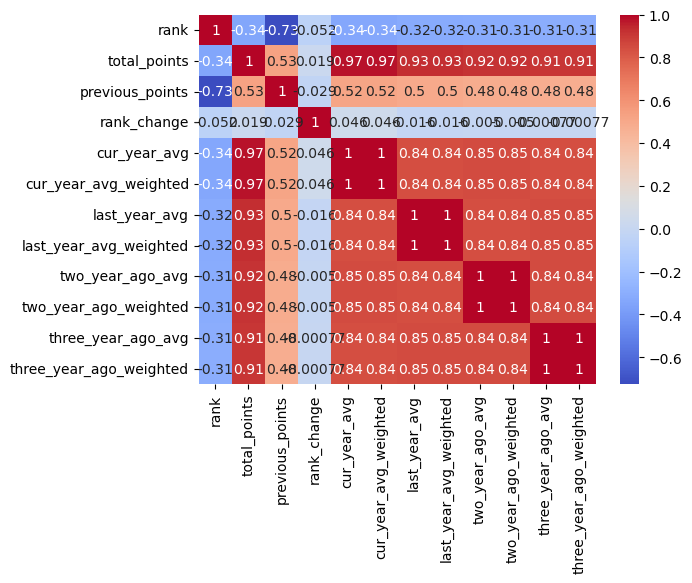

In [10]:
corr_matrix =df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

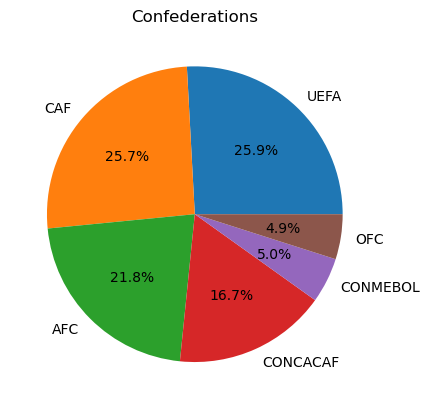

In [11]:
# Create a pie chart for confederation
confederation_counts = df['confederation'].value_counts()
plt.pie(confederation_counts.values, labels=confederation_counts.index, autopct='%1.1f%%')
plt.title('Confederations')
plt.show()

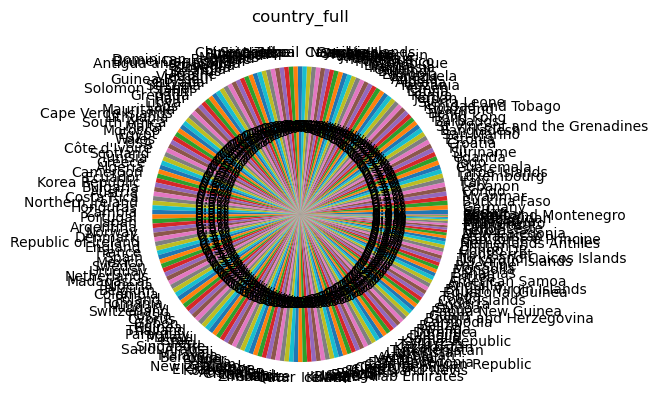

In [12]:
# Create a pie chart for confederation
confederation_counts = df['country_full'].value_counts()
plt.pie(confederation_counts.values, labels=confederation_counts.index, autopct='%1.1f%%')
plt.title('country_full')
plt.show()

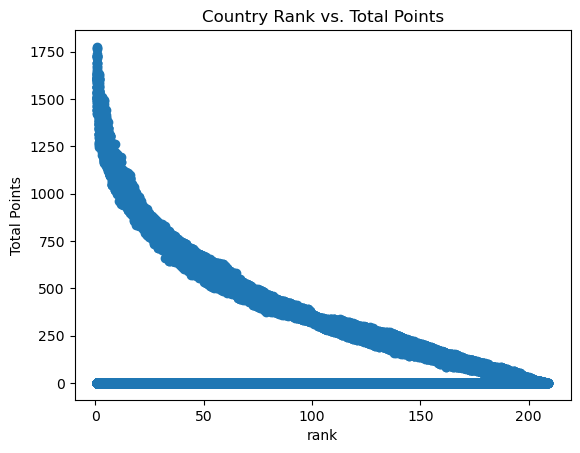

In [13]:
# Create scatter plot
plt.scatter(df['rank'], df['total_points'])

# Set axis labels and title
plt.xlabel('rank')
plt.ylabel('Total Points')
plt.title('Country Rank vs. Total Points')

# Show plot
plt.show()

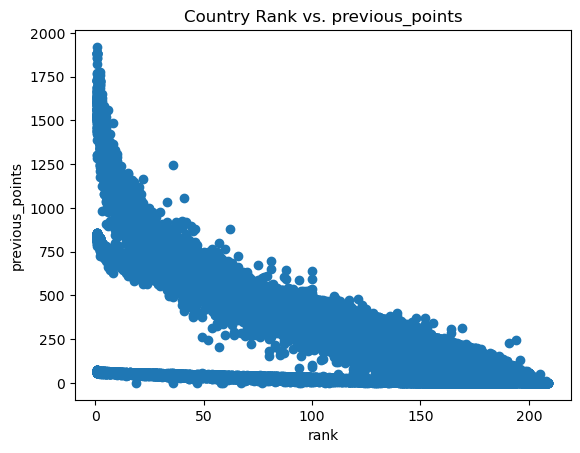

In [14]:
# Create scatter plot
plt.scatter(df['rank'], df['previous_points'])

# Set axis labels and title
plt.xlabel('rank')
plt.ylabel('previous_points')
plt.title('Country Rank vs. previous_points')

# Show plot
plt.show()

<AxesSubplot:ylabel='Density'>

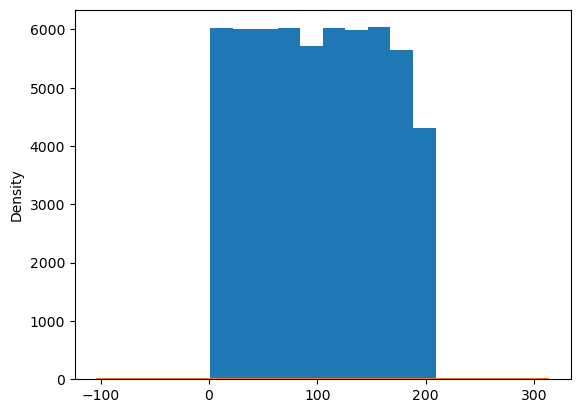

In [15]:
average_ranking = df['rank'].mean()
df['rank'].hist()
df['rank'].plot.density()

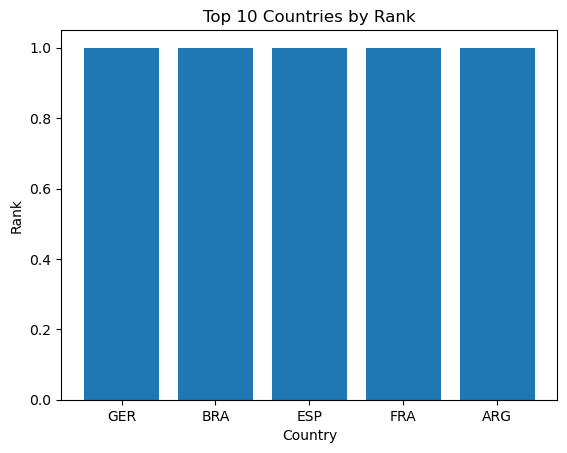

In [16]:
import matplotlib.pyplot as plt

# Create a bar chart of the top 10 countries by rank
top_10 = df[['country_abrv', 'rank']].sort_values('rank').head(10)
plt.bar(top_10['country_abrv'], top_10['rank'])
plt.title('Top 10 Countries by Rank')
plt.xlabel('Country')
plt.ylabel('Rank')
plt.show()

In [17]:
#Drop certain columns that aren't as relevant in the analysis
df.drop(columns=["country_full","rank_date","cur_year_avg_weighted","last_year_avg_weighted","two_year_ago_weighted","three_year_ago_weighted"], inplace=True)

In [18]:
df = pd.get_dummies(df, columns = ['confederation','country_abrv'])

In [19]:
df.head()

,rank,total_points,previous_points,rank_change,cur_year_avg,last_year_avg,two_year_ago_avg,three_year_ago_avg,confederation_AFC,confederation_CAF,...,country_abrv_VGB,country_abrv_VIE,country_abrv_VIN,country_abrv_VIR,country_abrv_WAL,country_abrv_YEM,country_abrv_YUG,country_abrv_ZAI,country_abrv_ZAM,country_abrv_ZIM
0,1,0.0,57,0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0.0,57,0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0.0,50,9,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0.0,55,0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0.0,51,5,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57756 entries, 0 to 57792
Columns: 230 entries, rank to country_abrv_ZIM
dtypes: float64(5), int64(3), uint8(222)
memory usage: 16.2 MB


In [21]:
print(df.dtypes)

rank                  int64
total_points        float64
previous_points       int64
rank_change           int64
cur_year_avg        float64
                     ...   
country_abrv_YEM      uint8
country_abrv_YUG      uint8
country_abrv_ZAI      uint8
country_abrv_ZAM      uint8
country_abrv_ZIM      uint8
Length: 230, dtype: object


In [22]:
X = df.drop('rank', axis=1)
y = df['rank']

In [23]:
X

,total_points,previous_points,rank_change,cur_year_avg,last_year_avg,two_year_ago_avg,three_year_ago_avg,confederation_AFC,confederation_CAF,confederation_CONCACAF,...,country_abrv_VGB,country_abrv_VIE,country_abrv_VIN,country_abrv_VIR,country_abrv_WAL,country_abrv_YEM,country_abrv_YUG,country_abrv_ZAI,country_abrv_ZAM,country_abrv_ZIM
0,0.0,57,0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,57,0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,50,9,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,55,0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,51,5,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,0.0,0,1,0.0,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
57789,0.0,0,1,0.0,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
57790,0.0,0,1,0.0,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
57791,0.0,0,1,0.0,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
y

0          1
1          2
2          3
3          4
4          5
        ... 
57788    206
57789    206
57790    206
57791    206
57792    206
Name: rank, Length: 57756, dtype: int64